In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization,Input,Embedding,Dense,Dot, Reshape
from tensorflow.keras import Model

In [3]:
def custom_standardization(input_data):
    return stripped_tags

In [4]:
tag_data=pd.read_csv("../data/genome-tags.csv")

VOCAB_SIZE=tag_data.tagId.nunique()+2

VOCAB_SIZE

1130

In [5]:
tag_data

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [6]:
VOCABULARY=tag_data.tag.unique().tolist()
len(VOCABULARY)

1128

In [7]:
SEQUENCE_LENGTH=50

In [8]:
master_data=pd.read_csv("../data/Master_dataset.csv")

In [9]:
NUMBER_OF_MOVIES=master_data.movieId.nunique()
NUMBER_OF_USERS=master_data.userId.nunique()

In [10]:
def create_model(embedding_size=16):
    user_tag=Input(name="user_tags",shape=[1],dtype=tf.string)
    movie_tag=Input(name="movie_tags",shape=[1],dtype=tf.string)

    user_tag_vectorized = TextVectorization(
    standardize="strip_punctuation",
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
    vocabulary=VOCABULARY)(user_tag)
    
    movie_tag_vectorized = TextVectorization(
    standardize="strip_punctuation",
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
    vocabulary=VOCABULARY)(movie_tag)
    
    user_embedding= Embedding(name = 'user_embedding',input_dim = NUMBER_OF_USERS, output_dim = embedding_size)(user_tag_vectorized)
    movie_embedding= Embedding(name = 'movie_embedding',input_dim = NUMBER_OF_MOVIES, output_dim = embedding_size)(movie_tag_vectorized)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, movie_embedding])
    
    merged = Reshape(target_shape = [2500])(merged)
    
    # merged=Dense(2500, activation="relu")(merged)
    
    # merged=Dense(1500, activation="relu")(merged)
    
    # merged=Dense(500, activation="relu")(merged)
    
    out = Dense(5, activation="softmax")(merged)
    
    model = Model(inputs = [user_tag, movie_tag], outputs = out)
    
    model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [11]:
model=create_model()

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_tags (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 movie_tags (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 50)          0           ['user_tags[0][0]']              
 ization)                                                                                         
                                                                                                  
 text_vectorization_1 (TextVect  (None, 50)          0           ['movie_tags[0][0]']         

In [13]:
def split_x_and_y(data,label="rating"):
    X_user=data["user_tags"]
    X_movie=data["tag"]
    y=data[label]
    return X_user,X_movie, y

In [14]:
train=pd.read_csv("../input/train_user_item.csv")
test=pd.read_csv("../input/test_user_item.csv")
validation=pd.read_csv("../input/validation_user_item.csv")

In [15]:
train_user, train_movie, train_y=split_x_and_y(train)
test_user, test_movie, test_y=split_x_and_y(test)

validation_user, validation_movie, validation_y=split_x_and_y(validation)

In [16]:
train

,user_tags,tag,rating
0,great acting original relationships,alone in the world alternate history alternate...,3
1,imdb top 250 great acting violence,aids dramatic emotional exceptional acting gay...,3
2,imdb top 250 great acting oscar (best directing),action awesome soundtrack chase chicago corrup...,3
3,imdb top 250 great acting oscar (best directing),artist biography creativity documentary drama ...,3
4,imdb top 250 storytelling weird,alien alien invasion aliens conspiracy conspir...,3
...,...,...,...
59979,action good action imdb top 250,18th century 19th century adaptation adapted f...,3
59980,imdb top 250 great acting storytelling,cinematography criterion death enigmatic forei...,4
59981,original imdb top 250 oscar (best directing),brutality good good soundtrack great ending in...,1
59982,great acting imdb top 250 oscar (best picture),comedy culture clash drama dysfunctional famil...,1


In [17]:
history=model.fit(
    x=[train_user,train_movie],
    y=train_y,
    batch_size=128,
    validation_data=([validation_user,validation_movie],validation_y),
    epochs=20)

Epoch 1/20
469/469 [==============================] - 11s 14ms/step - loss: 1.4247 - accuracy: 0.3556 - val_loss: 1.3944 - val_accuracy: 0.3720
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 1.3846 - accuracy: 0.3753 - val_loss: 1.3738 - val_accuracy: 0.3843
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 1.3699 - accuracy: 0.3842 - val_loss: 1.3607 - val_accuracy: 0.3895
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 1.3602 - accuracy: 0.3902 - val_loss: 1.3557 - val_accuracy: 0.3950
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 1.3523 - accuracy: 0.3929 - val_loss: 1.3555 - val_accuracy: 0.3919
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.3462 - accuracy: 0.3988 - val_loss: 1.3494 - val_accuracy: 0.3955
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.3397 - accuracy: 0.4011 - val_loss: 1.3450 - val_accuracy: 0.397

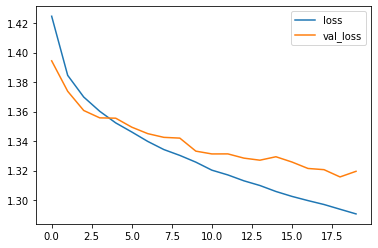

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])

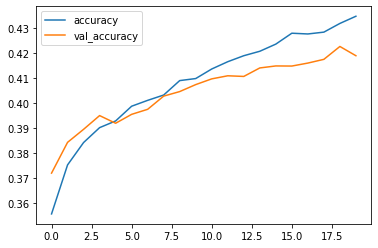

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

In [20]:
model.evaluate(
    x=[test_user,test_movie],
    y=test_y,
    batch_size=128,
    )

361/361 [==============================] - 3s 9ms/step - loss: 1.3170 - accuracy: 0.4174


[1.316954255104065, 0.417385458946228]

In [26]:
y_pred=np.argmax(model.predict([test_user, test_movie]),axis=1)

1442/1442 [==============================] - 8s 6ms/step


In [23]:
train_y.value_counts()

3    20703
2    16052
4    12849
1     6778
0     3602
Name: rating, dtype: int64

In [24]:
test_y.value_counts()

3    15891
2    12362
4    10005
1     5139
0     2745
Name: rating, dtype: int64

In [27]:
y_pred

array([3, 2, 1, ..., 2, 4, 3], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

In [29]:
test_y

0        3
1        2
2        1
3        3
4        4
        ..
46137    4
46138    2
46139    2
46140    4
46141    3
Name: rating, Length: 46142, dtype: int64

In [30]:
print(classification_report(y_pred=y_pred,y_true=test_y))

              precision    recall  f1-score   support

           0       0.55      0.20      0.30      2745
           1       0.36      0.09      0.14      5139
           2       0.37      0.50      0.43     12362
           3       0.43      0.58      0.49     15891
           4       0.48      0.28      0.36     10005

    accuracy                           0.42     46142
   macro avg       0.44      0.33      0.34     46142
weighted avg       0.43      0.42      0.40     46142

